Daftar Isi
1.   Membaca, mengecek dan menganalisanya data.csv 
2.   Membaca dan mengecek abusive.csv
3.   Membaca dan mengecek new_kamusalay.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
%cd /content/drive/MyDrive/Colab Notebooks/BINAR GOLD CHALLANGE

/content/drive/MyDrive/Colab Notebooks/BINAR GOLD CHALLANGE


In [12]:
# Import modul yang dibutuhkan 
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from wordcloud import WordCloud, STOPWORDS

**MEMBACA DATA.CSV**

In [13]:
# membaca file csv, encoding "latin-1" digunakan untuk memastikan bahwa karakter-karakter 
# khusus yang mungkin muncul dalam file CSV akan dibaca dengan benar oleh Pandas.
df = pd.read_csv('data.csv', encoding='latin-1')

In [44]:
# membaca data 5 teratas
df.head(2)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Topic,HS_Level
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Other,HS_Weak
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,Other,HS_Weak


In [49]:
df.shape

(13169, 15)

In [ ]:
# untuk melihat info kolom dari file csv 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [ ]:
# memastikan apakah ada kolom yang kosong atau tidak
df.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

Berikut ini pejelasan dari masing-masing kolom:
* HS : hate speech label;
* Abusive : abusive language label;
* HS_Individual : hate speech targeted to an individual;
* HS_Group : hate speech targeted to a group;
* HS_Religion : hate speech related to religion/creed;
* HS_Race : hate speech related to race/ethnicity;
* HS_Physical : hate speech related to physical/disability;
* HS_Gender : hate speech related to gender/sexual orientation;
* HS_Gender : hate related to other invective/slander;
* HS_Weak : weak hate speech;
* HS_Moderate : moderate hate speech;
* HS_Strong : strong hate speech.

In [ ]:
# Membaca karakter apa saja yang terdapat pada kolom tweet
karakter_khusus = set()
x = []
for tweet in df['Tweet']:
    # mencari karakter yang bukan huruf atau angka dalam tweet
    karakter_khusus_tweet = re.findall(r'[^a-zA-Z0-9\s]', tweet)
    # menambahkan karakter khusus pada tweet ke dalam set karakter khusus
    karakter_khusus.update(karakter_khusus_tweet)

# menampilkan karakter khusus yang ditemukan
print("Karakter khusus yang ditemukan:")
for karakter in karakter_khusus:
  x.append(karakter)
print(x)

Karakter khusus yang ditemukan:
['ª', ';', '[', 'ã', '.', '#', '·', 'á', '}', 'µ', '-', '¦', 'ð', '=', '±', 'Ø', 'Ä', '¤', '%', 'Â', '~', 'º', '«', ']', '»', '$', '\\', '"', '+', '°', ',', 'ë', '!', '?', '©', 'ï', '¨', '¼', 'â', '/', '£', '¸', '´', '¯', '®', '¡', '^', ')', '¹', '¢', '>', '@', '½', '¶', ':', '*', '(', 'Ù', '²', '³', '¬', 'Ã', '\xad', '|', '¥', '{', '§', '_', "'", '&', 'ê', '¿', '`']


In [ ]:
#Membuat Kolom Baru Untuk Mendefinisikan Hate Speech & Abusive'(HSA)
def add_type_column(row):
    if row['HS'] == 1 and row['Abusive'] == 1:
        return 'Hate Speech & Abusive'
    elif row['HS'] == 1 and row['Abusive'] == 0:
        return 'Hate Speech'
    elif row['HS'] == 0 and row['Abusive'] == 1:
        return 'Abusive'
    else:
        return 'Other'

df['Type'] = df.apply(add_type_column, axis=1)

NameError: ignored

In [ ]:
df[['Tweet', 'Type']]

,Tweet,Type
0,- disaat semua cowok berusaha melacak perhatia...,Hate Speech & Abusive
1,RT USER: USER siapa yang telat ngasih tau elu?...,Abusive
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",Other
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,Other
4,USER USER Kaum cebong kapir udah keliatan dong...,Hate Speech & Abusive
...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,Hate Speech & Abusive
13165,USER Kasur mana enak kunyuk',Abusive
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,Other
13167,USER USER USER USER Bom yang real mudah terdet...,Other


In [ ]:
df['Type'].value_counts()

Other                    5860
Hate Speech & Abusive    3295
Hate Speech              2266
Abusive                  1748
Name: Type, dtype: int64

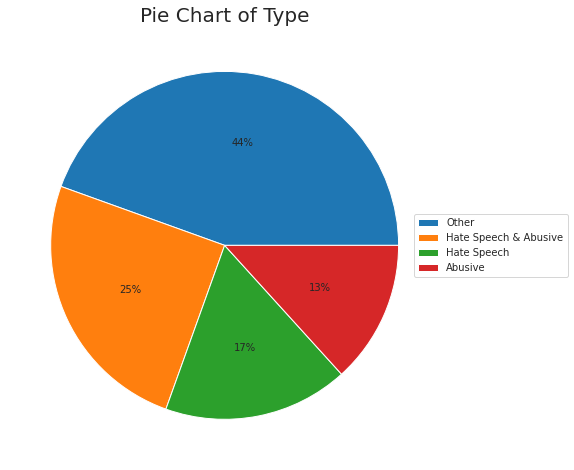

In [ ]:
# Membuat pie diagram
# Mengatur ukuran gambar dengan figsize
plt.figure(figsize=(8, 8))

# Memberikan judul pada pie chart
plt.title('Pie Chart of Type', fontsize=20)

# Membuat Pie Chart
plt.pie(df['Type'].value_counts(), autopct='%1.0f%%')

# Membuat keterangan di samping pie chart
plt.legend(df['Type'].value_counts().index, loc='right', bbox_to_anchor=(1.3, 0.5))

# Menampilkan plot
plt.show()

Dari filter sederhana yang sudah dilakukan dapat dilihat terdapat 25% HSA, 17% HS, dan 13% A.

Dari diangram pie di atas dapat terdapat 55% tweet yang mengandung HSA 

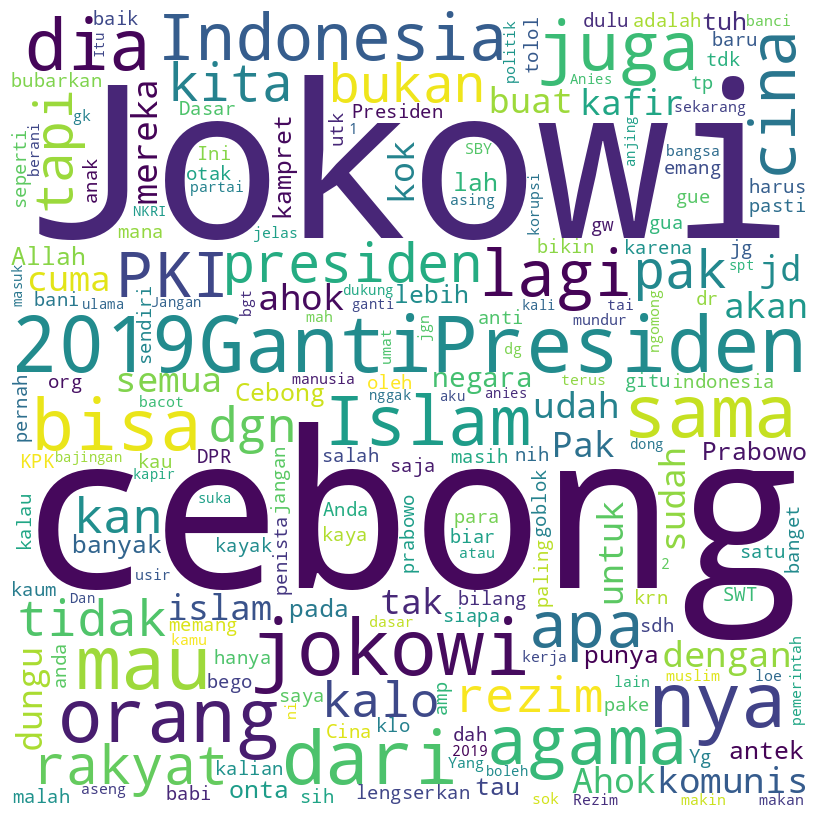

In [30]:
# Menampilkan data yang paling banyak muncul dari kolom type

# Mengambil data teks dari kolom 'Tweet' jika nilai kolom 'HS' sama dengan 1
text = df.loc[df['HS'] == 1, 'Tweet']

# Menggabungkan semua teks yang telah diambil menjadi satu string
all_text = " ".join(text)

# Menghapus simbol dan hanya menyisakan angka dan huruf
all_text = re.sub(r'[^a-zA-Z0-9\s]', '', all_text)

# Menghapus kata-kata yang tidak diperlukan
words_to_remove = r'USER|RT|yg|di|itu|ini|dan|URL|aja|yang|ada|ya|lu|ga|si|gak|ke|jadi|lo'
all_text = re.sub(r'\b(' + words_to_remove + r')\b', '', all_text)

# Menghitung frekuensi kemunculan kata-kata pada teks yang telah diproses
word_counts = Counter(all_text.split())

# Menginisialisasi objek WordCloud
wc = WordCloud(width=800, height=800, 
               background_color='white', 
               stopwords=STOPWORDS, 
               min_font_size=10)

# Membuat WordCloud dari hasil perhitungan frekuensi kata-kata
wc.generate_from_frequencies(word_counts)

# Menampilkan WordCloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()


In [32]:
# Fungsi untuk menentukan nilai pada kolom 'Topic'
def get_topic(row):
    if row['HS_Religion'] == 1:
        return 'Religion'
    elif row['HS_Race'] == 1:
        return 'Race'
    elif row['HS_Physical'] == 1:
        return 'Physical'
    elif row['HS_Gender'] == 1:
        return 'Gender'
    else:
        return 'Other'

# Menerapkan fungsi 'get_topic' pada setiap baris DataFrame
df['Topic'] = df.apply(get_topic, axis=1)

In [33]:
# Menggabungkan kolom 'HS_Weak', 'HS_Moderate', dan 'HS_Strong' menjadi satu kolom 'HS_Level'
df['HS_Level'] = df[['HS_Weak', 'HS_Moderate', 'HS_Strong']].idxmax(axis=1)


In [34]:
# Melihat isi kolom HS_Level
df['HS_Level'].value_counts()

HS_Weak        10991
HS_Moderate     1705
HS_Strong        473
Name: HS_Level, dtype: int64

In [35]:
df[['Topic', 'HS_Level']]


,Topic,HS_Level
0,Other,HS_Weak
1,Other,HS_Weak
2,Other,HS_Weak
3,Other,HS_Weak
4,Religion,HS_Moderate
...,...,...
13164,Physical,HS_Weak
13165,Other,HS_Weak
13166,Other,HS_Weak
13167,Other,HS_Weak


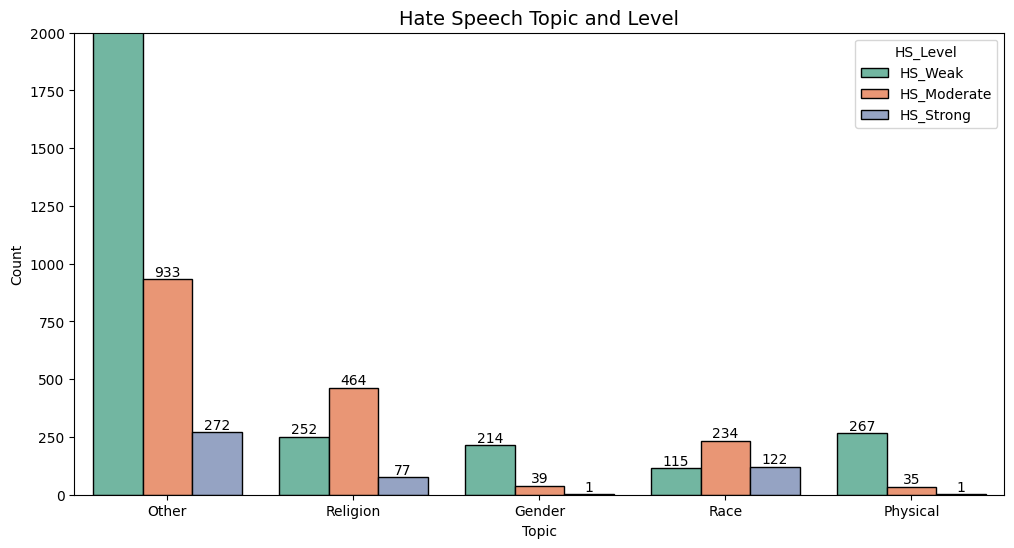

In [36]:
# Membuat plot
plt.figure(figsize=(12, 6))
plots = sns.countplot(x='Topic', hue='HS_Level', data=df, palette='Set2', edgecolor='black')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Topic')
plt.ylabel('Count')

# Menambahkan label pada tiap bar
for bar in plots.containers:
    plots.bar_label(bar,  label_type='edge' ,fontsize=10)

# Menentukan batas sumbu y
plt.ylim(0, 2000)

# Menambahkan judul plot
plt.title('Hate Speech Topic and Level', fontsize=14)

# Menampilkan plot
plt.show()

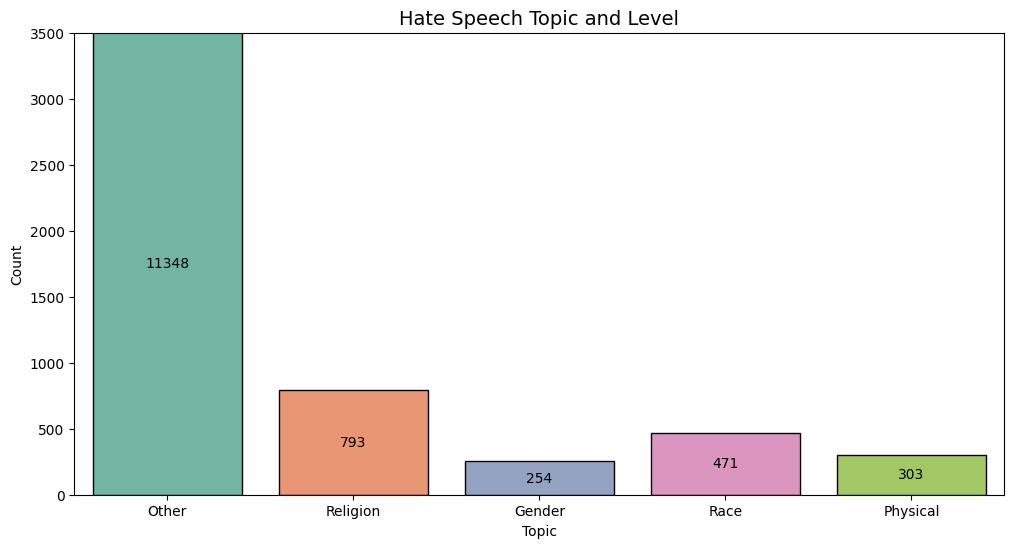

In [37]:
# Membuat plot
plt.figure(figsize=(12, 6))
plots = sns.countplot(x='Topic', data=df, palette='Set2', edgecolor='black')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Topic')
plt.ylabel('Count')

# Menambahkan label pada tiap bar
for bar in plots.containers:
    plots.bar_label(bar,  label_type='center' ,fontsize=10)

# Menentukan batas sumbu y
plt.ylim(0, 3500)

# Menambahkan judul plot
plt.title('Hate Speech Topic and Level', fontsize=14)

# Menampilkan plot
plt.show()

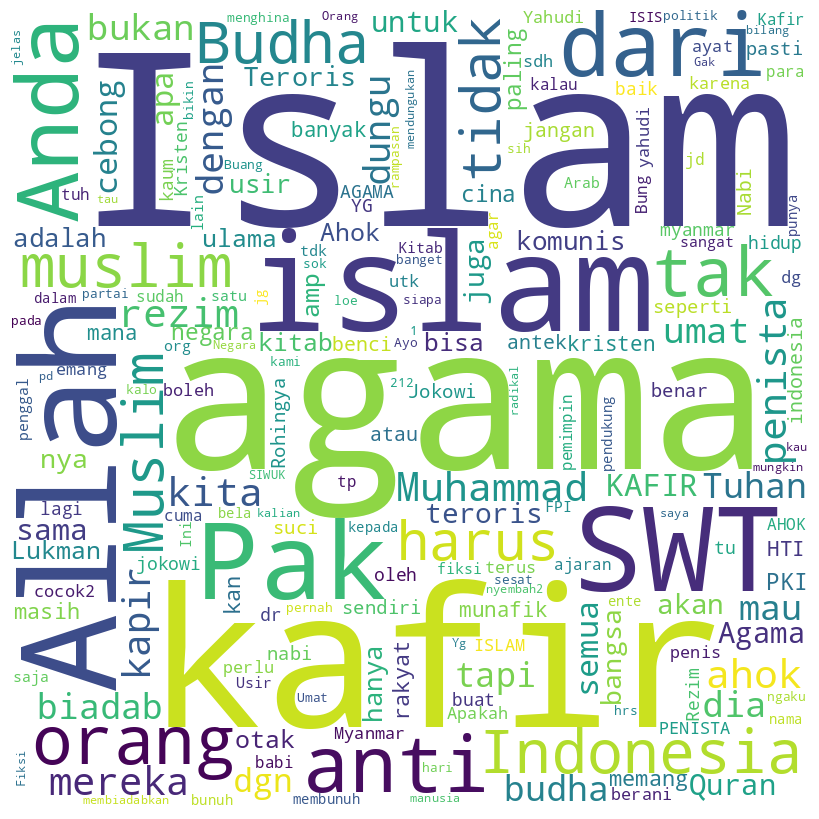

In [38]:
# Menampilkan data yang paling banyak mucul dari kolom Tweet berdasarkan Relligion 
# Mengambil data teks dari kolom 'Tweet' jika nilai kolom 'HS' sama dengan 1
text = df.loc[df['Topic'] == 'Religion', 'Tweet']

# Menggabungkan semua teks yang telah diambil menjadi satu string
all_text = " ".join(text)

# Menghapus simbol dan hanya menyisakan angka dan huruf
all_text = re.sub(r'[^a-zA-Z0-9\s]', '', all_text)

# Menghapus kata-kata yang tidak diperlukan
words_to_remove = r'USER|RT|yg|di|itu|ini|dan|URL|aja|yang|ada|ya|lu|ga|si|gak|ke|jadi|lo'
all_text = re.sub(r'\b(' + words_to_remove + r')\b', '', all_text)

# Menghitung frekuensi kemunculan kata-kata pada teks yang telah diproses
word_counts = Counter(all_text.split())

# Menginisialisasi objek WordCloud
wc = WordCloud(width=800, height=800, 
               background_color='white', 
               stopwords=STOPWORDS, 
               min_font_size=10)

# Membuat WordCloud dari hasil perhitungan frekuensi kata-kata
wc.generate_from_frequencies(word_counts)

# Menampilkan WordCloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()

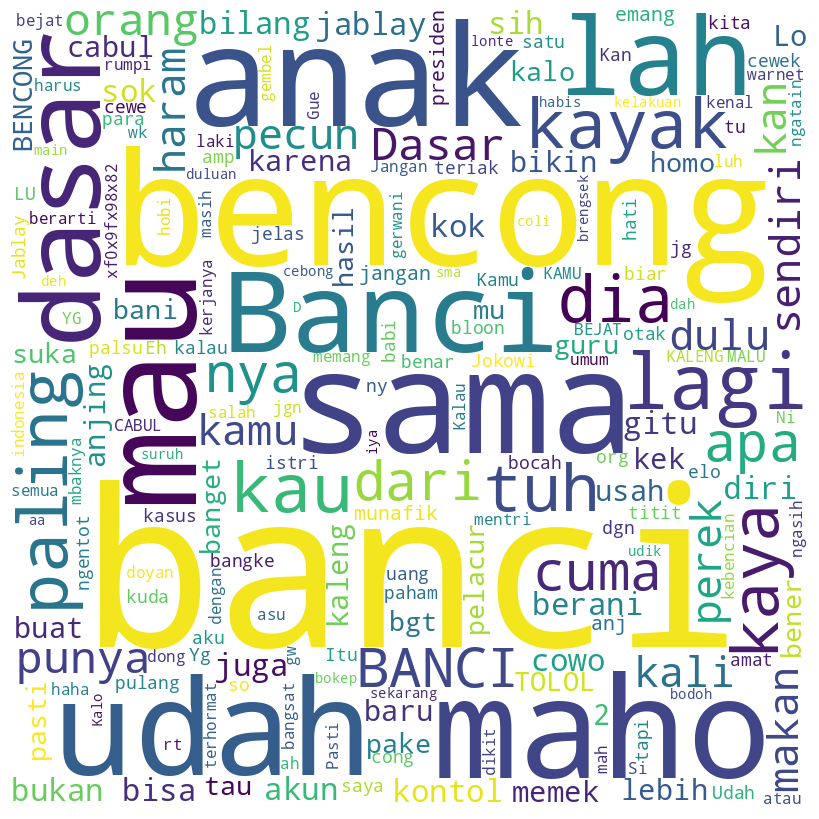

In [48]:
# Menampilkan data yang paling banyak mucul dari kolom Tweet berdasarkan Gender Topic 
text = df.loc[df['Topic'] == 'Gender', 'Tweet']

# Menggabungkan semua teks yang telah diambil menjadi satu string
all_text = " ".join(text)

# Menghapus simbol dan hanya menyisakan angka dan huruf
all_text = re.sub(r'[^a-zA-Z0-9\s]', '', all_text)

# Menghapus kata-kata yang tidak diperlukan
words_to_remove = r'USER|RT|yg|di|itu|ini|dan|URL|aja|yang|ada|ya|lu|ga|si|gak|ke|jadi|lo|jd|gue|gua|kntl'
all_text = re.sub(r'\b(' + words_to_remove + r')\b', '', all_text)

# Menghitung frekuensi kemunculan kata-kata pada teks yang telah diproses
word_counts = Counter(all_text.split())

# Menginisialisasi objek WordCloud
wc = WordCloud(width=800, height=800, 
               background_color='white', 
               stopwords=STOPWORDS, 
               min_font_size=10)

# Membuat WordCloud dari hasil perhitungan frekuensi kata-kata
wc.generate_from_frequencies(word_counts)

# Menampilkan WordCloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()

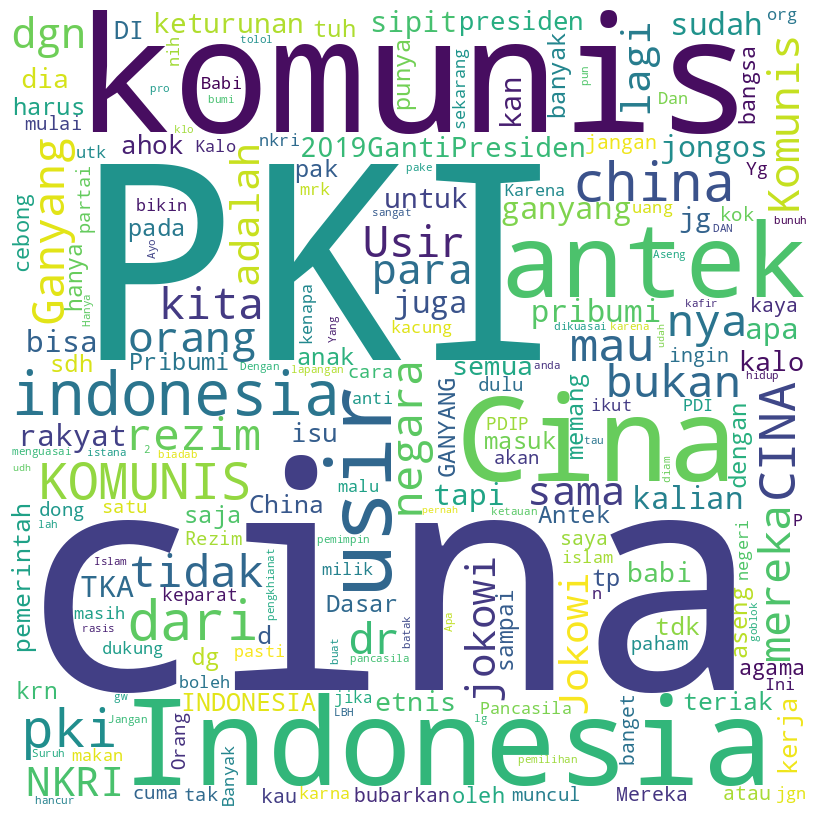

In [41]:
# Menampilkan data yang paling banyak mucul dari kolom Tweet berdasarkan Race 
text = df.loc[df['Topic'] == 'Race', 'Tweet']

# Menggabungkan semua teks yang telah diambil menjadi satu string
all_text = " ".join(text)

# Menghapus simbol dan hanya menyisakan angka dan huruf
all_text = re.sub(r'[^a-zA-Z0-9\s]', '', all_text)

# Menghapus kata-kata yang tidak diperlukan
words_to_remove = r'USER|RT|yg|di|itu|ini|dan|URL|aja|yang|ada|ya|lu|ga|si|gak|ke|jadi|lo|jd|'
all_text = re.sub(r'\b(' + words_to_remove + r')\b', '', all_text)

# Menghitung frekuensi kemunculan kata-kata pada teks yang telah diproses
word_counts = Counter(all_text.split())

# Menginisialisasi objek WordCloud
wc = WordCloud(width=800, height=800, 
               background_color='white', 
               stopwords=STOPWORDS, 
               min_font_size=10)

# Membuat WordCloud dari hasil perhitungan frekuensi kata-kata
wc.generate_from_frequencies(word_counts)

# Menampilkan WordCloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()

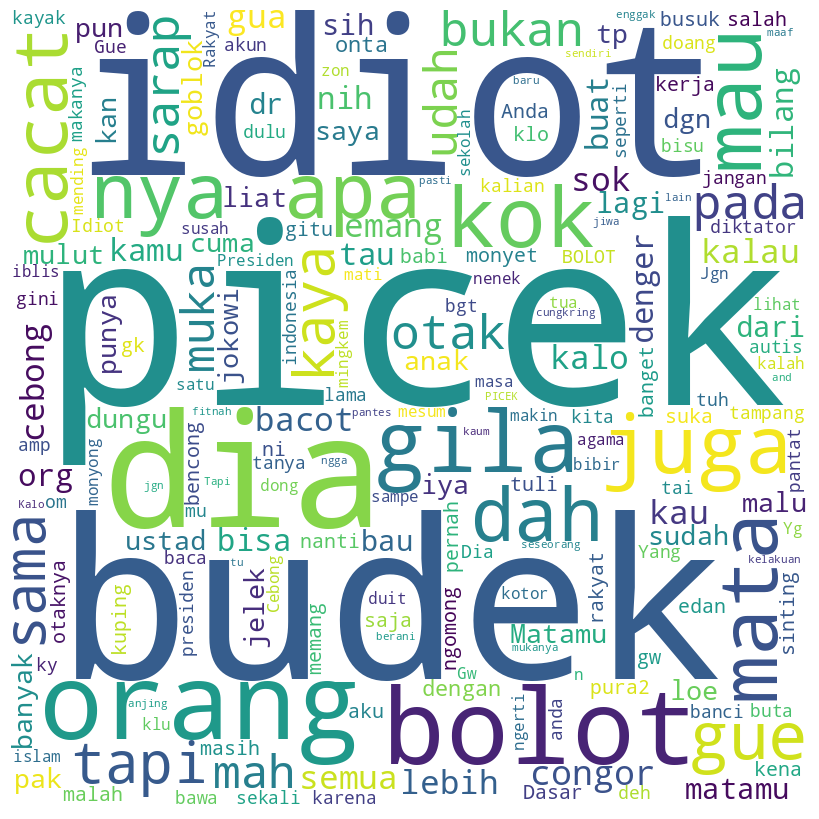

In [42]:
# Menampilkan data yang paling banyak mucul dari kolom Tweet berdasarkan Physical 
text = df.loc[df['Topic'] == 'Physical', 'Tweet']

# Menggabungkan semua teks yang telah diambil menjadi satu string
all_text = " ".join(text)

# Menghapus simbol dan hanya menyisakan angka dan huruf
all_text = re.sub(r'[^a-zA-Z0-9\s]', '', all_text)

# Menghapus kata-kata yang tidak diperlukan
words_to_remove = r'USER|RT|yg|di|itu|ini|dan|URL|aja|yang|ada|ya|lu|ga|si|gak|ke|jadi|lo|jd|'
all_text = re.sub(r'\b(' + words_to_remove + r')\b', '', all_text)

# Menghitung frekuensi kemunculan kata-kata pada teks yang telah diproses
word_counts = Counter(all_text.split())

# Menginisialisasi objek WordCloud
wc = WordCloud(width=800, height=800, 
               background_color='white', 
               stopwords=STOPWORDS, 
               min_font_size=10)

# Membuat WordCloud dari hasil perhitungan frekuensi kata-kata
wc.generate_from_frequencies(word_counts)

# Menampilkan WordCloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()

**MEMBACA ABUSIVE.CSV**

In [ ]:
ab = pd.read_csv('abusive.csv', encoding='latin-1')

In [ ]:
ab.head(3)

,ABUSIVE
0,alay
1,ampas
2,buta


In [ ]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ABUSIVE  125 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [ ]:
ab.isna().sum()

ABUSIVE    0
dtype: int64

**MEMBACA NEW_KAMUSALAY.CSV**

In [ ]:
nk = pd.read_csv('new_kamusalay.csv', encoding='latin-1')

In [ ]:
nk.head(3)

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi


In [ ]:
nk.isna().sum()

anakjakartaasikasik         0
anak jakarta asyik asyik    0
dtype: int64

In [ ]:
nk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15166 entries, 0 to 15165
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   anakjakartaasikasik       15166 non-null  object
 1   anak jakarta asyik asyik  15166 non-null  object
dtypes: object(2)
memory usage: 237.1+ KB


In [ ]:
df.columns


Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')